In [1]:
from ultralytics import YOLO
import os
import zipfile

In [2]:
# 3. Dézipper ton dataset
# ⚠️ Remplace "mon_dataset.zip" par le vrai nom de ton fichier
# ====================================


# Emplacement du fichier ZIP sur ton Drive   E:\hermanTPEE\DetectGorilleM.v10i.yolov11.zip DetectGorilleM.v10i.yolov8
zip_path = "E:/hermanTPEE/DetectGorilleM.v10i.yolov8.zip"
extract_dir = "/content/datasets"

# 1. Nettoyer l'ancien dossier (s'il existe déjà)
!rm -rf {extract_dir}/DetectGorilleM.v10i.yolov11

print("📦 Décompression du dataset en cours...")

# 2. Décompresser dans /content/datasets
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Décompression terminée !\n")



'rm' is not recognized as an internal or external command,
operable program or batch file.


📦 Décompression du dataset en cours...
✅ Décompression terminée !



In [3]:
# 3. Chercher automatiquement le dossier extrait
extracted_folders = [f.path for f in os.scandir(extract_dir) if f.is_dir()]
print("📂 Dossier(s) extrait(s) :")
for folder in extracted_folders:
    print("   →", folder)

# 4. Vérifier si data.yaml existe et afficher son chemin complet
for folder in extracted_folders:
    yaml_path = os.path.join(folder, "data.yaml")
    if os.path.exists(yaml_path):
        print("\n✅ Fichier data.yaml trouvé à l'adresse :")
        print("   ", yaml_path)
!find /content/datasets -name "data.yaml"import torch


📂 Dossier(s) extrait(s) :
   → /content/datasets\test
   → /content/datasets\train
   → /content/datasets\valid


FIND: Invalid switch


In [4]:
import torch
if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    gpu_memory = torch.cuda.get_device_properties(0).total_memory // 1024**3
    print(f"✅ GPU détecté : {gpu_name}")
    print(f"✅ Mémoire disponible : {gpu_memory} GB")
    accelerator = "GPU"
    device_config = "0"
else:
    print("💻 Aucun GPU détecté → utilisation du CPU")
    print("💡 Pour plus de vitesse: Exécution → Modifier type → GPU (ex: T4, V100)")
    accelerator = "CPU"
    device_config = "cpu"

✅ GPU détecté : NVIDIA GeForce RTX 2050
✅ Mémoire disponible : 3 GB


In [ ]:
import torch, gc
from ultralytics import YOLO

# ====================================
# 1. Nettoyage mémoire CUDA
# ====================================
gc.collect()
torch.cuda.empty_cache()

# ====================================
# 2. Charger le modèle YOLOv8s pré-entraîné
# Options: yolov8n.pt (nano), yolov8s.pt (small)
# ====================================
model = YOLO("yolov8s.pt")

# ====================================
# 3. Entraînement du modèle
# (optimisé pour GPU 4 Go)
# ====================================
model.train(
    data="/content/datasets/data.yaml",
    epochs=100,
    patience=20,        # early stopping
    imgsz=416,          # réduit par rapport à 640 pour éviter OOM
    batch=16,            # petit batch adapté à 4 Go VRAM
    workers=0,          # réduit charge CPU/GPU
    device=0,           # forcer utilisation GPU
    name="yolov8s-gorilles",
    augment=True        # data augmentation
)

# ====================================
# 4. Évaluation du modèle
# ====================================
metrics = model.val()
print(metrics)

# ====================================
# 5. Sauvegarder le modèle entraîné
# ====================================
best_model_path = model.ckpt_path
model.save("best_yolov8s_gorilles.pt")
print("✅ Modèle sauvegardé sous : best_yolov8s_gorilles.pt")


New https://pypi.org/project/ultralytics/8.3.183 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.177  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s-gorilles3, nbs=64, nms=False, opset=

train: Scanning E:\content\datasets\train\labels.cache... 6736 images, 21 backgrounds, 0 corrupt: 100%|██████████| 6736/6736 [00:00<?, ?it/s]

val: Fast image access  (ping: 0.00.0 ms, read: 732.6392.5 MB/s, size: 43.4 KB)



val: Scanning E:\content\datasets\valid\labels.cache... 291 images, 1 backgrounds, 0 corrupt: 100%|██████████| 291/291 [00:00<?, ?it/s]

Plotting labels to runs\detect\yolov8s-gorilles3\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs\detect\yolov8s-gorilles3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.03G      1.143      1.577      1.402         45        416: 100%|██████████| 421/421 [02:25<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]

                   all        291        327       0.73      0.765      0.756      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.85G      1.081      1.113      1.332         51        416: 100%|██████████| 421/421 [02:25<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.83it/s]

                   all        291        327      0.779       0.74      0.753      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.99G      1.148      1.195      1.374         47        416: 100%|██████████| 421/421 [02:20<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

                   all        291        327      0.736       0.65      0.704       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.99G      1.204      1.274      1.407         45        416: 100%|██████████| 421/421 [02:20<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.88it/s]

                   all        291        327      0.747      0.725      0.753      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.99G       1.19      1.231      1.405         36        416: 100%|██████████| 421/421 [02:22<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

                   all        291        327      0.731      0.761      0.779       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.99G       1.16      1.205      1.379         42        416: 100%|██████████| 421/421 [02:24<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

                   all        291        327      0.741      0.749      0.779      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.99G      1.134      1.157      1.364         45        416: 100%|██████████| 421/421 [6:00:12<00:00, 51.34s/it]      
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]

                   all        291        327        0.8      0.773      0.815      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.99G      1.118      1.116      1.354         49        416: 100%|██████████| 421/421 [02:25<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]

                   all        291        327      0.732      0.737      0.775      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.99G      1.099      1.094      1.343         47        416: 100%|██████████| 421/421 [02:27<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.73it/s]

                   all        291        327      0.817      0.823      0.855       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.99G      1.099      1.073      1.337         45        416: 100%|██████████| 421/421 [02:07<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.52it/s]

                   all        291        327      0.786      0.771      0.801      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.99G      1.078      1.037      1.328         49        416: 100%|██████████| 421/421 [02:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.44it/s]

                   all        291        327      0.816      0.787      0.826      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.99G      1.076      1.025       1.32         52        416: 100%|██████████| 421/421 [02:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]

                   all        291        327      0.811      0.746      0.803      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.99G      1.063     0.9976      1.314         41        416: 100%|██████████| 421/421 [02:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.08it/s]

                   all        291        327      0.863      0.801      0.866      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.99G      1.049     0.9794      1.305         54        416: 100%|██████████| 421/421 [02:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]

                   all        291        327      0.852       0.76      0.851      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.99G       1.04     0.9731      1.297         43        416: 100%|██████████| 421/421 [02:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.44it/s]

                   all        291        327      0.803      0.821      0.848      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.99G      1.035     0.9571      1.297         47        416: 100%|██████████| 421/421 [02:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.44it/s]

                   all        291        327      0.822      0.798      0.837      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.99G       1.02     0.9444      1.285         44        416: 100%|██████████| 421/421 [02:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]

                   all        291        327      0.838      0.828      0.874      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.99G      1.014     0.9243      1.281         48        416: 100%|██████████| 421/421 [02:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]

                   all        291        327       0.82      0.852      0.868       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.99G      1.016     0.9232      1.277         54        416: 100%|██████████| 421/421 [02:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]

                   all        291        327      0.832      0.811      0.848      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.99G      1.005     0.9062      1.274         42        416: 100%|██████████| 421/421 [02:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]

                   all        291        327      0.863      0.824       0.87      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.99G     0.9902     0.8896      1.263         50        416: 100%|██████████| 421/421 [02:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]

                   all        291        327      0.877      0.791      0.863      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.99G     0.9916     0.8846      1.264         44        416: 100%|██████████| 421/421 [02:27<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.96it/s]

                   all        291        327      0.872      0.832      0.879      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.99G     0.9711     0.8743      1.259         51        416: 100%|██████████| 421/421 [02:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.45it/s]

                   all        291        327      0.883      0.791      0.873      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.99G     0.9677     0.8605      1.247         45        416: 100%|██████████| 421/421 [02:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.49it/s]

                   all        291        327      0.868      0.877      0.907      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.99G      0.969     0.8438       1.25         49        416: 100%|██████████| 421/421 [02:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]

                   all        291        327      0.802      0.859       0.86      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.99G     0.9578     0.8358      1.247         45        416: 100%|██████████| 421/421 [02:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.41it/s]

                   all        291        327      0.859      0.851      0.881      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.99G     0.9601     0.8336      1.247         48        416: 100%|██████████| 421/421 [02:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.36it/s]

                   all        291        327      0.825      0.851      0.873      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.99G     0.9507     0.8098      1.234         48        416: 100%|██████████| 421/421 [02:08<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]

                   all        291        327      0.862      0.786      0.871      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.99G     0.9502      0.816      1.235         45        416: 100%|██████████| 421/421 [02:42<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]

                   all        291        327      0.876      0.822      0.885      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.99G     0.9342     0.7954      1.223         54        416: 100%|██████████| 421/421 [02:43<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.91it/s]

                   all        291        327      0.891      0.809      0.876      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.99G     0.9248     0.7939      1.222         44        416: 100%|██████████| 421/421 [02:41<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]

                   all        291        327      0.812       0.86      0.882      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.99G     0.9207     0.7867      1.222         52        416: 100%|██████████| 421/421 [02:42<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.91it/s]

                   all        291        327      0.859      0.826      0.892      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.99G     0.9119     0.7788      1.217         43        416: 100%|██████████| 421/421 [02:34<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]

                   all        291        327       0.84      0.816       0.87      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.99G     0.9101     0.7697      1.214         56        416: 100%|██████████| 421/421 [02:30<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.07it/s]

                   all        291        327      0.859      0.836      0.874      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.99G     0.9128     0.7539       1.21         47        416: 100%|██████████| 421/421 [02:34<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.16it/s]

                   all        291        327      0.855      0.869      0.887      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.99G     0.9072     0.7521       1.21         57        416: 100%|██████████| 421/421 [02:30<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.54it/s]

                   all        291        327      0.887      0.868      0.907      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.99G     0.8998     0.7342      1.204         45        416: 100%|██████████| 421/421 [02:26<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]

                   all        291        327      0.867      0.835      0.873      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.99G     0.8859     0.7262      1.198         50        416: 100%|██████████| 421/421 [02:26<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.60it/s]

                   all        291        327      0.858      0.857      0.895      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.99G     0.8814     0.7342      1.195         50        416: 100%|██████████| 421/421 [02:25<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.23it/s]

                   all        291        327      0.885      0.881      0.914       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.99G     0.8765     0.7171      1.196         57        416: 100%|██████████| 421/421 [02:34<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]

                   all        291        327      0.873      0.855      0.898      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.99G     0.8758     0.7072      1.196         59        416: 100%|██████████| 421/421 [02:41<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]

                   all        291        327      0.882      0.867      0.905      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.99G     0.8706     0.7061      1.186         54        416: 100%|██████████| 421/421 [02:38<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.05it/s]

                   all        291        327      0.867      0.856      0.888      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.99G     0.8669     0.6996      1.182         46        416: 100%|██████████| 421/421 [02:42<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.90it/s]

                   all        291        327      0.859      0.856      0.878      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.99G       0.86     0.6834      1.181         52        416: 100%|██████████| 421/421 [02:42<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]

                   all        291        327      0.793      0.856      0.852      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.99G     0.8504     0.6812      1.176         43        416: 100%|██████████| 421/421 [02:37<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.04it/s]

                   all        291        327       0.88      0.894      0.914      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.99G     0.8448     0.6716      1.173         41        416: 100%|██████████| 421/421 [02:39<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.01it/s]

                   all        291        327      0.844      0.858      0.871      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.99G     0.8307       0.65      1.162         49        416: 100%|██████████| 421/421 [02:07<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.41it/s]

                   all        291        327       0.86       0.83      0.876      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.99G     0.8266     0.6475      1.162         35        416: 100%|██████████| 421/421 [02:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.55it/s]

                   all        291        327      0.841      0.894        0.9      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.99G     0.8292     0.6575      1.161         47        416: 100%|██████████| 421/421 [02:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.37it/s]

                   all        291        327      0.889      0.851      0.881      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.99G     0.8219     0.6427      1.155         44        416: 100%|██████████| 421/421 [02:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.62it/s]

                   all        291        327      0.856      0.896      0.901      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.99G     0.8263      0.645      1.159         51        416: 100%|██████████| 421/421 [02:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.68it/s]

                   all        291        327      0.875      0.885      0.901      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.99G     0.8057     0.6286      1.145         43        416: 100%|██████████| 421/421 [02:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.40it/s]

                   all        291        327      0.887      0.883      0.909      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.99G     0.8002     0.6258      1.145         47        416: 100%|██████████| 421/421 [02:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.50it/s]

                   all        291        327      0.849      0.897      0.905      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.99G      0.799     0.6117      1.143         43        416: 100%|██████████| 421/421 [02:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.59it/s]

                   all        291        327      0.902      0.881      0.902      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.99G     0.7898      0.605      1.142         49        416: 100%|██████████| 421/421 [02:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]

                   all        291        327      0.877       0.87      0.893      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.99G     0.7815     0.6007      1.132         43        416: 100%|██████████| 421/421 [02:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.57it/s]

                   all        291        327      0.868      0.881      0.893      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.99G     0.7863     0.6111      1.136         59        416: 100%|██████████| 421/421 [02:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.50it/s]

                   all        291        327      0.882      0.886      0.913      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.99G     0.7697     0.5869      1.124         50        416: 100%|██████████| 421/421 [02:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.57it/s]

                   all        291        327      0.866      0.905      0.918      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.99G     0.7715      0.593      1.126         53        416: 100%|██████████| 421/421 [02:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.64it/s]

                   all        291        327      0.875      0.853      0.898       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.99G     0.7719      0.583      1.125         45        416: 100%|██████████| 421/421 [01:59<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.46it/s]

                   all        291        327      0.878      0.879      0.908      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.99G     0.7492     0.5632      1.112         45        416: 100%|██████████| 421/421 [02:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.48it/s]

                   all        291        327      0.895       0.88      0.901      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.99G     0.7533     0.5636      1.116         51        416: 100%|██████████| 421/421 [01:59<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.53it/s]

                   all        291        327      0.899      0.873      0.904      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.99G     0.7523     0.5604      1.116         53        416: 100%|██████████| 421/421 [02:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.45it/s]

                   all        291        327      0.864      0.864      0.885      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.99G     0.7405     0.5536      1.115         42        416: 100%|██████████| 421/421 [02:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.62it/s]

                   all        291        327      0.883      0.879      0.895      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.99G     0.7356     0.5511      1.103         51        416: 100%|██████████| 421/421 [02:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.54it/s]

                   all        291        327      0.867      0.867      0.884      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.99G     0.7303     0.5519      1.104         44        416: 100%|██████████| 421/421 [02:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]

                   all        291        327       0.87      0.884      0.893        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.99G      0.719     0.5303      1.096         47        416: 100%|██████████| 421/421 [02:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.46it/s]

                   all        291        327      0.911      0.835      0.891      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.99G     0.7226     0.5363        1.1         43        416: 100%|██████████| 421/421 [02:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]

                   all        291        327      0.895      0.873      0.895        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.99G     0.7069     0.5306      1.092         43        416: 100%|██████████| 421/421 [02:10<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

                   all        291        327      0.886      0.869      0.898      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.99G     0.7047     0.5226      1.091         46        416: 100%|██████████| 421/421 [03:04<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.37it/s]

                   all        291        327      0.888       0.87      0.898        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.99G     0.7039      0.515      1.089         44        416: 100%|██████████| 421/421 [02:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.46it/s]

                   all        291        327      0.888      0.885      0.907      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.99G     0.6954     0.5099      1.083         51        416: 100%|██████████| 421/421 [02:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]

                   all        291        327      0.855      0.894      0.906      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.99G      0.691     0.5052      1.081         44        416: 100%|██████████| 421/421 [02:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]

                   all        291        327      0.863      0.877      0.902      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.99G     0.6826     0.5047      1.077         48        416: 100%|██████████| 421/421 [02:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.42it/s]

                   all        291        327      0.919       0.86      0.915      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.99G     0.6834     0.5026      1.078         51        416: 100%|██████████| 421/421 [02:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]

                   all        291        327      0.883      0.881       0.91      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.99G     0.6769      0.485      1.075         55        416: 100%|██████████| 421/421 [02:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.45it/s]

                   all        291        327      0.883      0.887      0.907      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.99G     0.6699      0.493      1.074         49        416: 100%|██████████| 421/421 [02:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.40it/s]

                   all        291        327      0.927      0.851      0.916      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.99G      0.656     0.4752      1.061         47        416: 100%|██████████| 421/421 [02:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]

                   all        291        327      0.898      0.883      0.909      0.601
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 58, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



78 epochs completed in 8.928 hours.
Optimizer stripped from runs\detect\yolov8s-gorilles3\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\yolov8s-gorilles3\weights\best.pt, 22.5MB

Validating runs\detect\yolov8s-gorilles3\weights\best.pt...
Ultralytics 8.3.177  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]


                   all        291        327      0.859      0.875       0.91       0.62
           Non_Gorille        122        122      0.904      0.921      0.946      0.647
      goriile_montagne        123        155      0.876      0.903      0.949      0.647
        gorille_Autres         45         50      0.797        0.8      0.836      0.567
Speed: 0.1ms preprocess, 7.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\yolov8s-gorilles3
Ultralytics 8.3.177  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 639.3268.8 MB/s, size: 49.7 KB)


val: Scanning E:\content\datasets\valid\labels.cache... 291 images, 1 backgrounds, 0 corrupt: 100%|██████████| 291/291 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.66it/s]


                   all        291        327       0.86      0.875      0.911      0.622
           Non_Gorille        122        122      0.903       0.92      0.947      0.647
      goriile_montagne        123        155      0.877      0.903      0.948       0.65
        gorille_Autres         45         50      0.799        0.8      0.838      0.568
Speed: 0.1ms preprocess, 12.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\yolov8s-gorilles32
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002B37BB08E50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011

: 


image 1/294 D:\Nouveau dossier\hermanTPEE\test\images\1004_jpg.rf.eb4fcb346f54d8e379e12e29bf3659ee.jpg: 288x416 1 gorille_Autres, 178.8ms
image 2/294 D:\Nouveau dossier\hermanTPEE\test\images\100_jpg.rf.aa5bbb6fec9d09516733727236d56c92.jpg: 256x416 3 goriile_montagnes, 148.5ms
image 3/294 D:\Nouveau dossier\hermanTPEE\test\images\101_jpg.rf.e600a81d79f850f766f549d05a375be4.jpg: 288x416 1 goriile_montagne, 240.0ms
image 4/294 D:\Nouveau dossier\hermanTPEE\test\images\1043_jpg.rf.fb8a0d44fff1b302a2e7c22c89b1b893.jpg: 288x416 1 goriile_montagne, 191.8ms
image 5/294 D:\Nouveau dossier\hermanTPEE\test\images\1049_jpg.rf.48be053a3de5e59228735176c471a236.jpg: 288x416 1 goriile_montagne, 187.6ms
image 6/294 D:\Nouveau dossier\hermanTPEE\test\images\1050_jpg.rf.2fba5a68f6f08ff2a2a571bb6ddd5dd8.jpg: 288x416 1 goriile_montagne, 210.1ms
image 7/294 D:\Nouveau dossier\hermanTPEE\test\images\1070_jpg.rf.2e48156fac36512b493c95cf26b59b89.jpg: 288x416 1 goriile_montagne, 173.7ms
image 8/294 D:\Nouveau

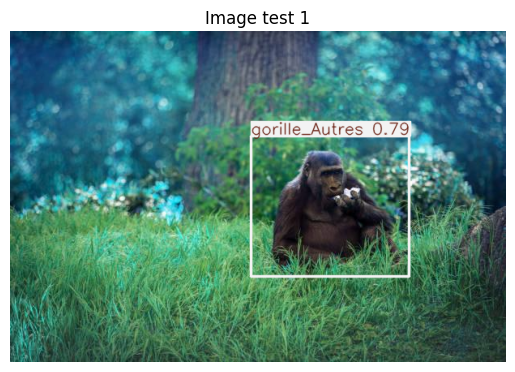

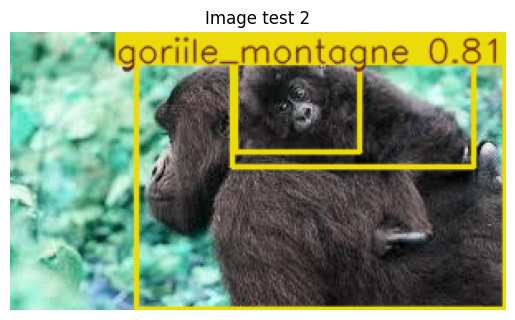

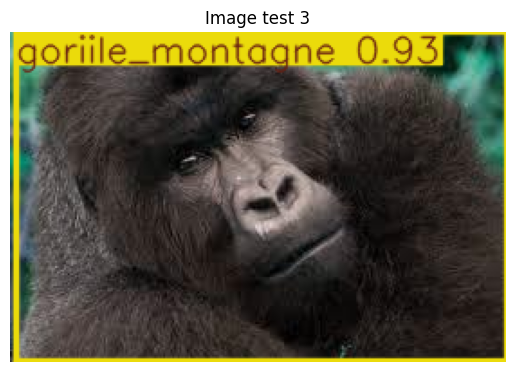

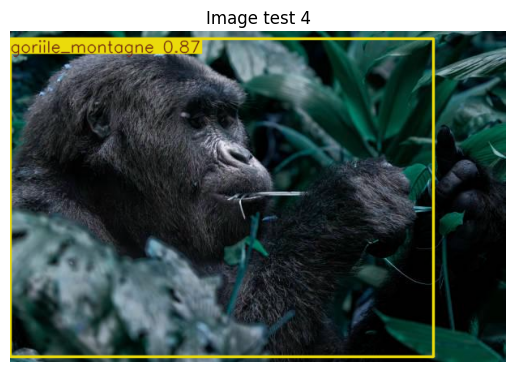

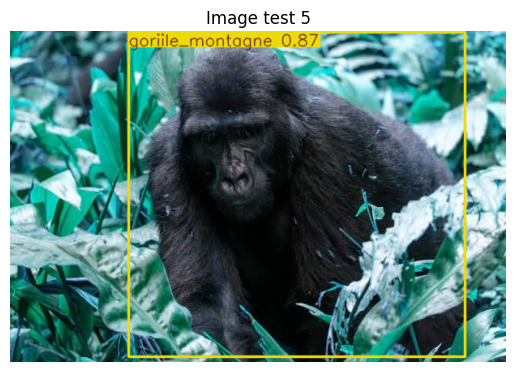

Ultralytics 8.3.174  Python-3.10.11 torch-2.7.0+cpu CPU (Intel Core(TM) i5-6200U 2.30GHz)
val: Fast image access  (ping: 0.10.0 ms, read: 25.445.1 MB/s, size: 70.2 KB)


val: Scanning D:\Nouveau dossier\hermanTPEE\valid\labels.cache... 291 images, 1 backgrounds, 0 corrupt: 100%|██████████| 291/291 [00:00<?, ?it/s]
c:\Users\hermanhk\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:53<00:00,  2.80s/it]


                   all        291        327       0.89      0.887      0.918      0.625
           Non_Gorille        122        122      0.928      0.926      0.962      0.634
      goriile_montagne        123        155      0.912      0.934      0.953      0.652
        gorille_Autres         45         50      0.831        0.8       0.84      0.588
Speed: 0.8ms preprocess, 161.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to c:\Users\hermanhk\runs\detect\val12


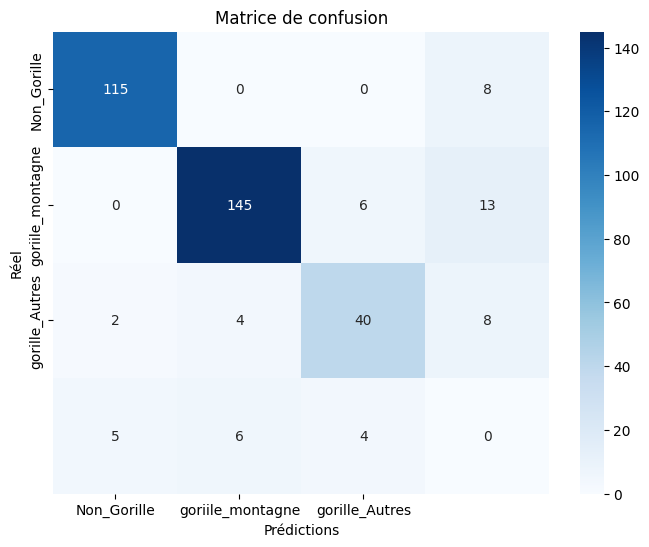

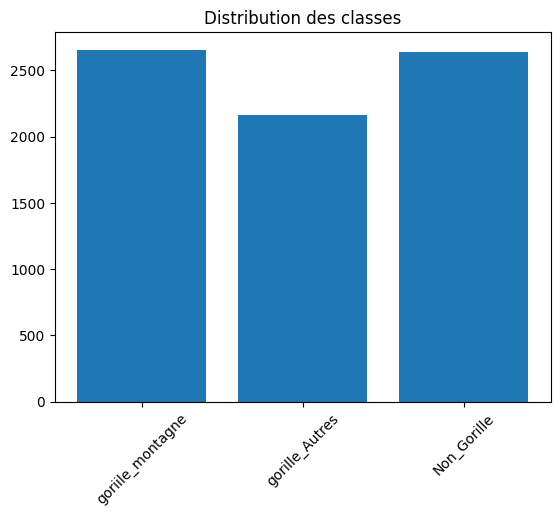

Précision par classe : [    0.92789     0.91183     0.83127]
Rappel par classe : [    0.92623     0.93409         0.8]
F1-score par classe : [    0.92706     0.92283     0.81533]
mAP50 : 0.9181353285672661
mAP50-95 : 0.6249048687104853


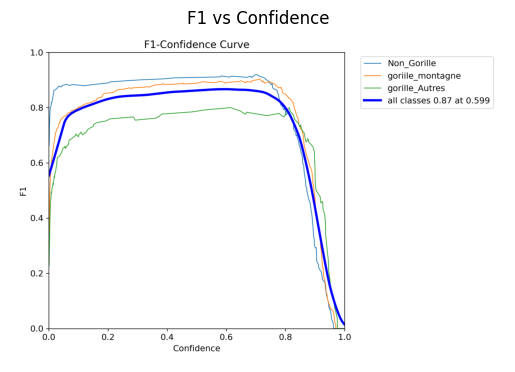

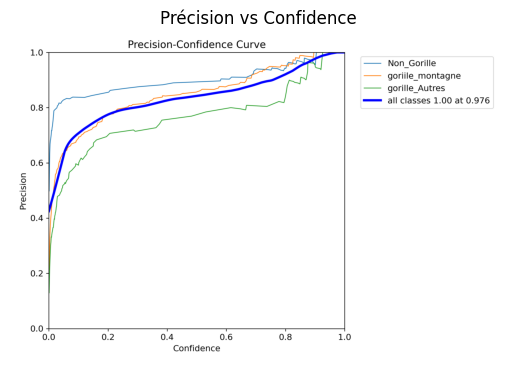

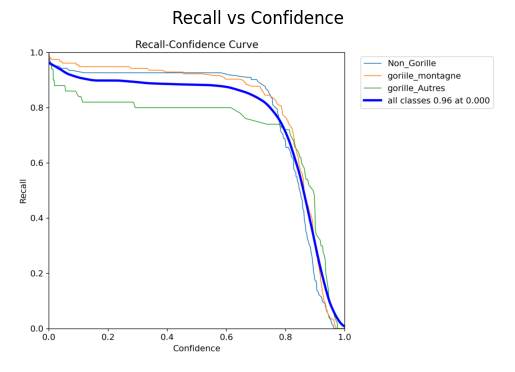

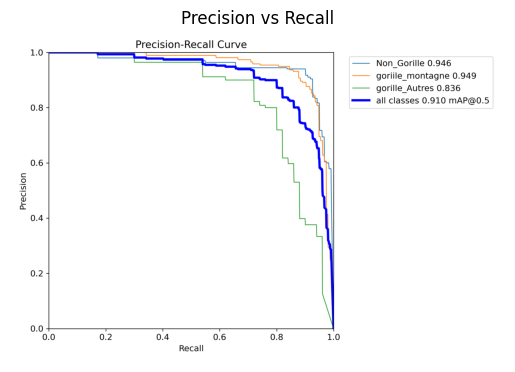

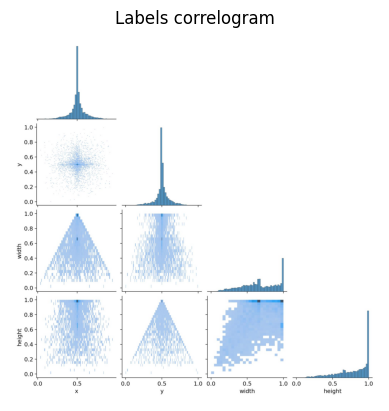

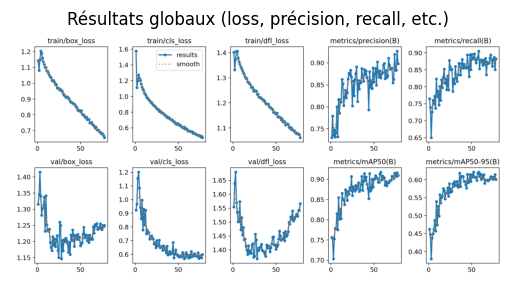

In [2]:
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
import seaborn as sns
import numpy as np
import os

# ================================
# 1. Charger le modèle entraîné
# ================================
# Remplace par le chemin de ton modèle

model = YOLO("D:/Nouveau dossier/hermanTPEE/best_yolov8s_gorilles.pt")

# ================================
# 2. Afficher 5 images de test avec prédictions
# ================================
datset="D:/Nouveau dossier/hermanTPEE/test/images" 
results = model.predict(source=datset, save=False, conf=0.25, max_det=10)

# Sauvegarder et afficher 5 exemples
for i, r in enumerate(results[:5]):
    r.plot()
    plt.imshow(r.plot())
    plt.axis("off")
    plt.title(f"Image test {i+1}")
    plt.show()

# ================================
# 3. Matrice de confusion
# ================================

metrics = model.val(data="D:/Nouveau dossier/hermanTPEE/data.yaml")
  # Évalue sur le set de validation/test
conf_matrix = metrics.confusion_matrix.matrix

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues",
            xticklabels=metrics.names.values(),
            yticklabels=metrics.names.values())
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()

# ================================
# 4. Courbes d’entraînement (loss, précision, etc.)
# ================================
# Ultralytics sauvegarde déjà les graphiques dans runs/detect/train

results_dir = "runs/detect/train"

# Pertes (loss)
plt.figure()
for loss_file in ["results.png", "confusion_matrix.png"]:
    if os.path.exists(os.path.join(results_dir, loss_file)):
        img = plt.imread(os.path.join(results_dir, loss_file))
        plt.imshow(img)
        plt.axis("off")
        plt.title(loss_file)
        plt.show()

# ================================
# 5. Distribution des classes dans le dataset
# ================================
from collections import Counter
import yaml

# Charger les classes
yamal="D:/Nouveau dossier/hermanTPEE/data.yaml"
with open(yamal, "r") as f:
    data_yaml = yaml.safe_load(f)
classes = data_yaml["names"]

# Charger labels
#lb="D:\Nouveau dossier\hermanTPEE\train\labels"
labels_dir = "D:/Nouveau dossier/hermanTPEE/train/labels"
all_labels = []
for file in os.listdir(labels_dir):
    with open(os.path.join(labels_dir, file)) as f:
        for line in f.readlines():
            all_labels.append(int(line.split()[0]))

counter = Counter(all_labels)
plt.bar([classes[i] for i in counter.keys()], counter.values())
plt.xticks(rotation=45)
plt.title("Distribution des classes")
plt.show()

# ================================
# 6. Précision, rappel et F1-score
# ================================
print("Précision par classe :", metrics.box.p)
print("Rappel par classe :", metrics.box.r)
print("F1-score par classe :", metrics.box.f1)
print("mAP50 :", metrics.box.map50)
print("mAP50-95 :", metrics.box.map)

save_dir = "D:/Nouveau dossier/hermanTPEE/runs/detect/yolov8s-gorilles2"

# 1. F1 vs confidence
f1_curve = os.path.join(save_dir, "BoxF1_curve.png")
if os.path.exists(f1_curve):
    img = plt.imread(f1_curve)
    plt.imshow(img)
    plt.axis("off")
    plt.title("F1 vs Confidence")
    plt.show()

# 2. Précision vs confidence
p_curve = os.path.join(save_dir, "BoxP_curve.png")
if os.path.exists(p_curve):
    img = plt.imread(p_curve)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Précision vs Confidence")
    plt.show()

# 3. Recall vs confidence
r_curve = os.path.join(save_dir, "BoxR_curve.png")
if os.path.exists(r_curve):
    img = plt.imread(r_curve)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Recall vs Confidence")
    plt.show()

# 4. Precision-Recall curve
pr_curve = os.path.join(save_dir, "BoxPR_curve.png")
if os.path.exists(pr_curve):
    img = plt.imread(pr_curve)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Precision vs Recall")
    plt.show()

# 5. Labels correlogram
labels_corr = os.path.join(save_dir, "labels_correlogram.jpg")
if os.path.exists(labels_corr):
    img = plt.imread(labels_corr)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Labels correlogram")
    plt.show()

# 6. Résultats globaux
results_img = os.path.join(save_dir, "results.png")
if os.path.exists(results_img):
    img = plt.imread(results_img)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Résultats globaux (loss, précision, recall, etc.)")
    plt.show()


In [3]:
!pip install reportlab



In [7]:
import sys
print(sys.executable)

import pkg_resources
print([p.key for p in pkg_resources.working_set])


c:\Users\hermanhk\AppData\Local\Programs\Python\Python310\python.exe
['pywin32', 'pyzmq', 'ipython', 'jupyter-client', 'ipykernel', 'traitlets', 'jupyter-core', 'decorator', 'prompt-toolkit', 'asttokens', 'executing', 'debugpy', 'jedi', 'parso', 'stack-data', 'wcwidth', 'comm', 'pure-eval', 'matplotlib-inline', 'certifi', 'jsonschema-specifications', 'fsspec', 'python-iso639', 'pytz', 'tzdata', 'regex', 'setuptools', 'cryptography', 'attrs', 'flatbuffers', 'pip', 'packaging', 'aiofiles', 'virtualenv', 'pyarrow', 'libclang', 'rich', 'websockets', 'pillow', 'py-cpuinfo', 'tenacity', 'ultralytics', 'click', 'psutil', 'multidict', 'importlib-resources', 'tornado', 'pyyaml', 'lxml', 'watchdog', 'pypdf', 'cachetools', 'altair', 'smmap', 'tqdm', 'fonttools', 'jsonschema', 'beautifulsoup4', 'typing-extensions', 'opencv-python', 'anyio', 'platformdirs', 'gitdb', 'async-timeout', 'gradio', 'marshmallow', 'protobuf', 'filelock', 'h5py', 'rapidfuzz', 'aiohttp', 'orjson', 'matplotlib', 'idna', 'ker

In [ ]:

import streamlit as st
from ultralytics import YOLO
from PIL import Image
import tempfile
import cv2
import numpy as np
from collections import Counter
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
import os

# ================================
# 1. Charger le modèle
# ================================
@st.cache_resource
def load_model():
    model = YOLO("D:/Nouveau dossier/hermanTPEE/best_yolov8s_gorilles.pt")  # ⚠️ adapter le chemin
    return model

model = load_model()

# ================================
# 2. Fonction pour générer un PDF
# ================================
def generate_pdf(report_data, filename="rapport_detection.pdf"):
    c = canvas.Canvas(filename, pagesize=A4)
    c.setFont("Helvetica-Bold", 16)
    c.drawString(200, 800, "Rapport de détection YOLOv8")

    c.setFont("Helvetica", 12)
    y = 760
    for img_name, detections in report_data.items():
        c.drawString(50, y, f"Image : {img_name}")
        y -= 20
        if detections:
            for obj, count in detections.items():
                c.drawString(80, y, f"- {obj} : {count}")
                y -= 15
        else:
            c.drawString(80, y, "- Aucun objet détecté")
            y -= 15
        y -= 10

        if y < 100:  # nouvelle page si trop bas
            c.showPage()
            c.setFont("Helvetica", 12)
            y = 760

    c.save()
    return filename

# ================================
# 3. Interface principale
# ================================
st.set_page_config(page_title="Détection YOLOv8", layout="wide")
st.title("🔍 Détection d’objets avec YOLOv8")
st.sidebar.title("⚙️ Options")

mode = st.sidebar.radio("Choisir un mode :", ["Uploader des images", "Détection temps réel (Webcam)"])

# ================================
# Mode 1 : Batch upload
# ================================
if mode == "Uploader des images":
    st.subheader("📂 Uploader jusqu'à 100 images")
    uploaded_files = st.file_uploader("Choisir des images", type=["jpg", "jpeg", "png"], accept_multiple_files=True)

    if uploaded_files:
        if len(uploaded_files) > 100:
            st.warning("⚠️ Vous avez uploadé plus de 100 images, seules les 100 premières seront traitées.")
            uploaded_files = uploaded_files[:100]

        cols = st.columns(3)  # afficher en grille
        report_data = {}

        for i, uploaded_file in enumerate(uploaded_files):
            # Sauvegarder temporairement
            tfile = tempfile.NamedTemporaryFile(delete=False)
            tfile.write(uploaded_file.read())
            image_path = tfile.name

            # Détection
            results = model(image_path)
            res_plotted = results[0].plot()

            # Récupérer les classes détectées
            detections = [model.names[int(c)] for c in results[0].boxes.cls]
            counts = dict(Counter(detections))
            report_data[uploaded_file.name] = counts

            # Afficher résultat
            with cols[i % 3]:
                st.image(res_plotted, caption=f"Résultat - {uploaded_file.name}", use_column_width=True)

        # Générer un rapport PDF
        pdf_file = generate_pdf(report_data)
        with open(pdf_file, "rb") as f:
            st.download_button("📥 Télécharger le rapport PDF", f, file_name="rapport_detection.pdf")

# ================================
# Mode 2 : Détection en temps réel
# ================================
elif mode == "Détection temps réel (Webcam)":
    st.subheader("🎥 Détection en temps réel via webcam")
    run = st.checkbox("Démarrer la caméra")

    FRAME_WINDOW = st.image([])

    cap = cv2.VideoCapture(0)  # 0 = webcam par défaut

    while run:
        ret, frame = cap.read()
        if not ret:
            st.error("⚠️ Impossible d'accéder à la caméra")
            break

        # Détection YOLO
        results = model(frame)
        res_plotted = results[0].plot()

        # Convertir BGR -> RGB pour Streamlit
        FRAME_WINDOW.image(res_plotted[:, :, ::-1])

    cap.release()
    cv2.destroyAllWindows()


2025-08-23 11:55:56.389 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 11:56:20.732 
  command:

    streamlit run C:\Users\hermanhk\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-23 11:56:21.868 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 11:56:21.880 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 11:56:22.417 Thread 'Thread-23': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 11:56:22.422 Thread 'Thread-23': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 11:56:24.727 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 11:56:24.728 Thr

Ce projet de recherche s’inscrit dans le domaine de la vision par ordinateur et consiste à mettre en place un système de reconnaissance automatique des gorilles, avec une attention particulière portée à l’identification des gorilles de montagne. L’étude propose un prototype expérimental basé sur l’architecture YOLOv8s pour la détection et utilisant Streamlit comme interface de visualisation et d’interaction.